In [ ]:
from datasets import load_dataset

dataset = load_dataset("masakhaner", "swa")
dataset

In [11]:
# print all unique labels(ner tags)

ner_tags = dataset["train"].features["ner_tags"].feature.names
print(ner_tags)

['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-DATE', 'I-DATE']


In [ ]:
# tga mapping

mapping = {
    "O": 0,
    "B-PER": 1,
    "I-PER": 2,
    "B-ORG": 3,
    "I-ORG": 4,
    "B-LOC": 5,
    "I-LOC": 6,
    "B-DATE": 7,
    "I-DATE": 8,
}


In [8]:
# convert to pandas dataframe
df = dataset["train"].to_pandas()
df.head()

,id,tokens,ner_tags
0,0,"[Wizara, ya, afya, ya, Tanzania, imeripoti, Ju...","[3, 4, 4, 4, 4, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"[Walioambukizwa, wote, ni, raia, wa, Tanzania,...","[0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 6, 6, 6, 6, 0, ..."
2,2,"[Wizara, ya, afya, imeripoti, kwamba, juhudi, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,3,"[Wakati, wa, maadimisho, ya, pasaka, ,, wakris...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"[Kuna, mijadala, kwenye, mitandao, ya, kijamii...","[0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [10]:
x1 = df['ner_tags'].iloc[0]
x2 = df['ner_tags'].iloc[1]

print(x1)
print(x2)

[3 4 4 4 4 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 5 0 0 0 5 6 6 6 6 0 0 0 5 0]


In [49]:
# set of all tag counts to 0
O_count = 0
B_PER_count = 0
I_PER_count = 0
B_ORG_count = 0
I_ORG_count = 0
B_LOC_count = 0
I_LOC_count = 0
B_DATE_count = 0
I_DATE_count = 0

In [53]:
# store all tags in a list
all_tags = df['ner_tags'].tolist()
print(len(all_tags))


2109


In [54]:
from tqdm.auto import tqdm

# for each item in the list, count the number of each tag
for item in tqdm(all_tags):
    for tag in i:
        if tag == 0:
            O_count += 1
        elif tag == 1:
            B_PER_count += 1
        elif tag == 2:
            I_PER_count += 1
        elif tag == 3:
            B_ORG_count += 1
        elif tag == 4:
            I_ORG_count += 1
        elif tag == 5:
            B_LOC_count += 1
        elif tag == 6:
            I_LOC_count += 1
        elif tag == 7:
            B_DATE_count += 1
        elif tag == 8:
            I_DATE_count += 1

  0%|          | 0/2109 [00:00<?, ?it/s]

In [55]:
# print all tag counts

print('O_count: ', O_count)
print('B_PER_count: ', B_PER_count)
print('I_PER_count: ', I_PER_count)
print('B_ORG_count: ', B_ORG_count)
print('I_ORG_count: ', I_ORG_count)
print('B_LOC_count: ', B_LOC_count)
print('I_LOC_count: ', I_LOC_count)
print('B_DATE_count: ', B_DATE_count)
print('I_DATE_count: ', I_DATE_count)

O_count:  25334
B_PER_count:  0
I_PER_count:  0
B_ORG_count:  1
I_ORG_count:  4
B_LOC_count:  6330
I_LOC_count:  8440
B_DATE_count:  1
I_DATE_count:  0


In [57]:
import pandas as pd

# new df with the ner_tag and count columns
tag_df = pd.DataFrame(columns=['ner_tag', 'count'])

# add all tag counts to the df
tag_df = tag_df.append({'ner_tag': 'O', 'count': O_count}, ignore_index=True)
tag_df = tag_df.append({'ner_tag': 'B-PER', 'count': B_PER_count}, ignore_index=True)
tag_df = tag_df.append({'ner_tag': 'I-PER', 'count': I_PER_count}, ignore_index=True)
tag_df = tag_df.append({'ner_tag': 'B-ORG', 'count': B_ORG_count}, ignore_index=True)
tag_df = tag_df.append({'ner_tag': 'I-ORG', 'count': I_ORG_count}, ignore_index=True)
tag_df = tag_df.append({'ner_tag': 'B-LOC', 'count': B_LOC_count}, ignore_index=True)
tag_df = tag_df.append({'ner_tag': 'I-LOC', 'count': I_LOC_count}, ignore_index=True)
tag_df = tag_df.append({'ner_tag': 'B-DATE', 'count': B_DATE_count}, ignore_index=True)
tag_df = tag_df.append({'ner_tag': 'I-DATE', 'count': I_DATE_count}, ignore_index=True)

tag_df

<ipython-input-57-8734e0b82abe>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tag_df = tag_df.append({'ner_tag': 'O', 'count': O_count}, ignore_index=True)
<ipython-input-57-8734e0b82abe>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tag_df = tag_df.append({'ner_tag': 'B-PER', 'count': B_PER_count}, ignore_index=True)
<ipython-input-57-8734e0b82abe>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tag_df = tag_df.append({'ner_tag': 'I-PER', 'count': I_PER_count}, ignore_index=True)
<ipython-input-57-8734e0b82abe>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tag_df = tag_df.append({'ner_tag': 'B-ORG', 'count': B_ORG_count}, ig

,ner_tag,count
0,O,25334
1,B-PER,0
2,I-PER,0
3,B-ORG,1
4,I-ORG,4
5,B-LOC,6330
6,I-LOC,8440
7,B-DATE,1
8,I-DATE,0


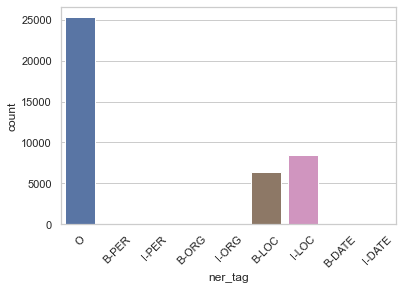

In [58]:
# plot counts with seaborn

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="ner_tag", y="count", data=tag_df)
plt.xticks(rotation=45)
plt.show()


### Discusinon

- From the above plot, it is clear that this dataset is imbalanced. The majority of the words are tagged as O. This is a problem because the model will be biased towards predicting O.
- Since this is meant for NER task, we will need a balanced dataset. I wont be resolving this using oversampling or undersampling because the dataset is small. 
- For now I will use the WikiAnn dataset to train the model.
- Addtionaly, I've decided to build my own tagging tool to thus create a balanced dataset for Swahili NER. Details for this are available in the [Swahili NER tagging tool](https://github.com/e-olang/NLP/tree/main/Swahili%20NER/Tag%20Tool)
- For feedback, please contact me on [Twitter](https://twitter.com/joeolang) or [Email](mailto:oluoch9@gmail.com)